1\. **Maximum wind speed prediction at the Sprogø station**

The exercise goal is to predict the maximum wind speed occurring every 50 years even if no measure exists for such a period. The available data are only measured over 21 years at the Sprogø meteorological station located in Denmark. 

The annual maxima are supposed to fit a normal probability density function. However such function is not going to be estimated because it gives a probability from a wind speed maxima. Finding the maximum wind speed occurring every 50 years requires the opposite approach, the result needs to be found from a defined probability. That is the quantile function role and the exercise goal will be to find it. In the current model, it is supposed that the maximum wind speed occurring every 50 years is defined as the upper 2% quantile.

By definition, the quantile function is the inverse of the cumulative distribution function. The latter describes the probability distribution of an annual maxima. In the exercise, the cumulative probability $p_i$ for a given year i is defined as $p_i = i/(N+1)$ with $N = 21$, the number of measured years. Thus it will be possible to calculate the cumulative probability of every measured wind speed maxima. From those experimental points, the scipy.interpolate module will be very useful for fitting the quantile function. Finally the 50 years maxima is going to be evaluated from the cumulative probability of the 2% quantile.

Practically, load the dataset:

```python
import numpy as np
max_speeds = np.load('max-speeds.npy')
years_nb = max_speeds.shape[0]
```

Compute then the cumulative probability $p_i$ (`cprob`) and sort the maximum speeds from the data. Use then the  UnivariateSpline from scipy.interpolate to define a quantile function and thus estimate the probabilities.

In the current model, the maximum wind speed occurring every 50 years is defined as the upper 2% quantile. As a result, the cumulative probability value will be:

```python
fifty_prob = 1. - 0.02
```

So the storm wind speed occurring every 50 years can be guessed as:

``` python
fifty_wind = quantile_func(fifty_prob)
```



In [1]:
import numpy as np
from scipy import linalg as la
import matplotlib.pyplot as plt
from scipy.interpolate import UnivariateSpline
from scipy import optimize
import pandas as pd
max_speeds = np.load('max-speeds.npy')
years_nb = max_speeds.shape[0]

Fifthy wind:  32.97989844019469


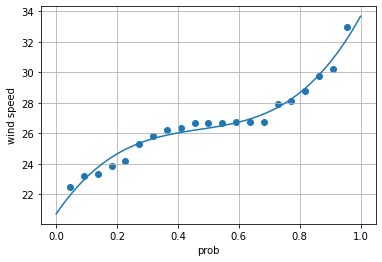

In [2]:
cum=[]

for i in range(len(max_speeds)):
    cum.append(((i+1)/(1+len(max_speeds))))

max_speeds=np.sort(max_speeds)
quantile_func=UnivariateSpline(cum,max_speeds)
sped=np.linspace(0,1,100)

plt.scatter(cum,max_speeds)
plt.plot(sped,quantile_func(sped))
plt.xlabel('prob')
plt.ylabel('wind speed')
plt.grid(True)
plt.show


fifty_prob = 1. - 0.02
fifty_wind = quantile_func(fifty_prob)

print('Fifthy wind: ', fifty_wind)

2\. **Curve fitting of temperature in Alaska** 

The temperature extremes in Alaska for each month, starting in January, are given by (in degrees Celcius):

max:  17,  19,  21,  28,  33,  38, 37,  37,  31,  23,  19,  18

min: -62, -59, -56, -46, -32, -18, -9, -13, -25, -46, -52, -58

* Plot these temperature extremes.
* Define a function that can describe min and max temperatures. 
* Fit this function to the data with scipy.optimize.curve_fit().
* Plot the result. Is the fit reasonable? If not, why?
* Is the time offset for min and max temperatures the same within the fit accuracy?

Normal distribution parameters for max_temp:  [132.8094418    6.73581628   2.29443552  15.77932097]
Normal distribution parameters for min_temp:  [260.76390537   7.1645259    1.9759002  -61.32093712]


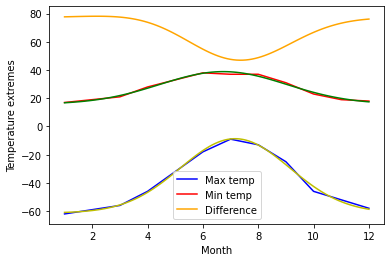

In [3]:
max_temp=np.array([17, 19, 21, 28, 33, 38, 37, 37, 31, 23, 19, 18])
min_temp=np.array([-62, -59, -56, -46, -32, -18, -9, -13, -25, -46, -52, -58])
month=np.arange(1,13)

min_t=plt.plot(month,min_temp,'b',label='Max temp')
max_t=plt.plot(month,max_temp,'r',label='Min temp')
plt.xlabel('Month')
plt.ylabel('Temperature extremes')
plt.show

def norm (x,A,mu, sigma,d):
    return (A*(np.exp(-((x-mu)**2)/(2*(sigma**2))))*(1/pow(2*np.pi*(sigma**2),1/2)))+d


params_max, params_covariance_max = optimize.curve_fit(norm, month, max_temp, p0=[10,7,1,20], maxfev=10000)
params_min, params_covariance_min = optimize.curve_fit(norm, month, min_temp, p0=[10,7,1,-60], maxfev=10000)
time=np.linspace(1,12,100)
plt.plot(time,norm(time,params_max[0],params_max[1],params_max[2],params_max[3]),'g')
plt.plot(time,norm(time,params_min[0],params_min[1],params_min[2],params_min[3]),'y')
plt.plot(time,norm(time,params_max[0],params_max[1],params_max[2],params_max[3])-norm(time,params_min[0],params_min[1],params_min[2],params_min[3]),'orange',label='Difference')

plt.legend(loc='best')
plt.show
print('Normal distribution parameters for max_temp: ', params_max)
print('Normal distribution parameters for min_temp: ', params_min)

#the fit is quite reasonable

3\. **2D minimization of a six-hump camelback function**

$$
f(x,y) = \left(4-2.1x^2+\frac{x^4}{3} \right) x^2 +xy + (4y^2 -4)y^2
$$

has multiple global and local minima. Find the global minima of this function.

Hints:

* Variables can be restricted to $-2 < x < 2$ and $-1 < y < 1$.
* Use numpy.meshgrid() and pylab.imshow() to find visually the regions.
* Use scipy.optimize.minimize(), optionally trying out several of its methods.

How many global minima are there, and what is the function value at those points? What happens for an initial guess of $(x, y) = (0, 0)$ ?


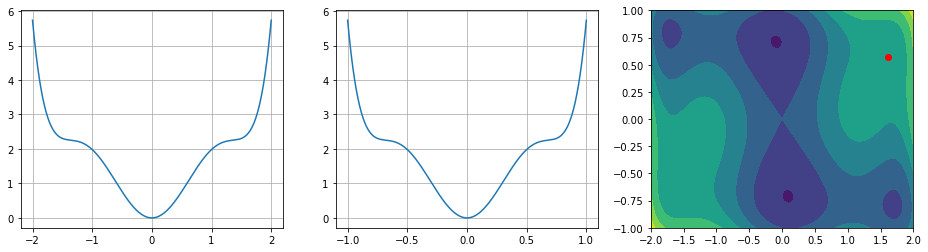

      fun: 2.104250310311258
 hess_inv: array([[ 0.10532339, -0.01399397],
       [-0.01399397,  0.13486032]])
      jac: array([ 1.78813934e-07, -5.96046448e-08])
  message: 'Optimization terminated successfully.'
     nfev: 39
      nit: 8
     njev: 13
   status: 0
  success: True
        x: array([1.60710476, 0.56865144])

In [4]:
def f (x):
    return (4.-2.1*(x[0]**2)+((x[0]**4)/3))*x[0]**2+x[0]*x[1]+(4*x[1]**2-4)*x[1]**2

x=np.linspace(-2,2,1000)
y=np.linspace(-1,1,1000)

fig = plt.figure(figsize=(16, 4))
gridsize = (1, 3)
ax1 = plt.subplot2grid(gridsize, (0, 0))
ax1=plt.plot(x,f([x,y]))
plt.grid(True)
ax2=plt.subplot2grid(gridsize, (0, 1))
ax2=plt.plot(y,f([x,y]))
plt.grid(True)
plt.show
xx, yy = np.meshgrid(x, y, sparse=True)


z = f([xx,yy])
h=plt.subplot2grid(gridsize,(0,2))
h = plt.contourf(x,y,z)
solutions = optimize.minimize(f, x0=[1.5,0.25])
plt.scatter(solutions.x[0],solutions.x[1],c='r')
plt.show()


solutions

#there are 6 local minima

#for (x,y)=(0,0), the algorith, without specifyng any particular method, finds a solutions for the minumum problem,
#although it's not correct.
#this problem is fixed e.g. setting as method ‘Nelder-Mead’

#without specifyng the method, the algorith finds more difficult to detect the minimum in m1=(1.70360694, -0.79608373)
#and in m2=(-1.70360694, 0.79608373), so you have to specify more accurately the initial position x= to find it
#the method ‘Nelder-Mead’ needs less initial precision

#also the  ‘Powell’ method needs an high initial accurancy to find the minima m1 and m2

4\. **FFT of a simple dataset**

Performe a periodicity analysis on the lynxs-hares population

In [5]:
from scipy import fftpack

/home/francesco/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/home/francesco/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/home/francesco/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/home/francesco/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/home/francesco/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dt

Period hares:  10.370109381591867
Period lynves:  10.43584640724966
Period carrots:  10.231350974320634


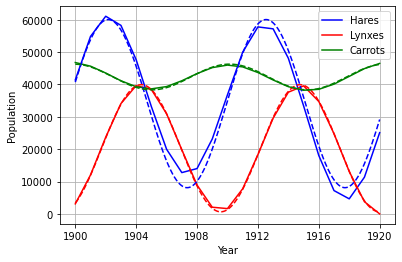

In [108]:
a=np.loadtxt('populations.txt')

a_hares_fft = fftpack.fft(a[:,1])

power_hares = np.abs(a_hares_fft)

sample_freq_hares = fftpack.fftfreq(a.shape[0], d=1)

pos_mask_hares = np.where(sample_freq_hares > 0)
freqs_hares = sample_freq_hares[pos_mask_hares]
peak_freq = freqs_hares[power_hares[pos_mask_hares].argmax()]

high_freq_fft_hares = a_hares_fft.copy()
high_freq_fft_hares[np.abs(sample_freq_hares) > peak_freq] = 0
filtered_sig_hares = fftpack.ifft(high_freq_fft_hares)

plt.plot(a[:,0], filtered_sig_hares, 'b', label='Hares')

#LYNXES

a_lynxes_fft = fftpack.fft(a[:,2])

power_lynxes = np.abs(a_lynxes_fft)

sample_freq_lynxes = fftpack.fftfreq(a.shape[0], d=1)

pos_mask_lynxes = np.where(sample_freq_lynxes > 0)
freqs_lynxes = sample_freq_lynxes[pos_mask_lynxes]
peak_freq = freqs_lynxes[power_lynxes[pos_mask_lynxes].argmax()]

high_freq_fft_lynxes = a_lynxes_fft.copy()
high_freq_fft_lynxes[np.abs(sample_freq_lynxes) > peak_freq] = 0
filtered_sig_lynxes = fftpack.ifft(high_freq_fft_lynxes)

plt.plot(a[:,0], filtered_sig_lynxes, 'r', label='Lynxes')


#CARROTS

a_carrots_fft = fftpack.fft(a[:,3])

power_carrots = np.abs(a_carrots_fft)

sample_freq_carrots = fftpack.fftfreq(a.shape[0], d=1)

pos_mask_carrots = np.where(sample_freq_carrots > 0)
freqs_carrots = sample_freq_carrots[pos_mask_carrots]
peak_freq_carrots = freqs_carrots[power_carrots[pos_mask_carrots].argmax()]

high_freq_fft_carrots = a_carrots_fft.copy()
high_freq_fft_carrots[np.abs(sample_freq_carrots) > peak_freq_carrots] = 0
filtered_sig_carrots = fftpack.ifft(high_freq_fft_carrots)

plt.plot(a[:,0], filtered_sig_carrots, 'g', label='Carrots')
plt.ylabel('Population')
plt.xlabel('Year')
plt.xticks(np.arange(1900,1921,4))
plt.grid(True)
plt.legend()

#FIT

def sin(x,A,t,p,d):
    return (np.sin(x*t+p)*A)+d
t_f=np.linspace(1900,1920,1000)

h_p,h_c=optimize.curve_fit(sin,a[:,0],filtered_sig_hares,p0=[2000,1,1,2500])
plt.plot(t_f,sin(t_f,h_p[0],h_p[1],h_p[2],h_p[3]),'b--')

l_p,l_c=optimize.curve_fit(sin,a[:,0],filtered_sig_lynxes,p0=[20000,0.6,700,25000])
plt.plot(t_f,sin(t_f,l_p[0],l_p[1],l_p[2],l_p[3]),'r--')

c_p,c_c=optimize.curve_fit(sin,a[:,0],filtered_sig_carrots,p0=[20000,0.6,700,25000])
plt.plot(t_f,sin(t_f,c_p[0],c_p[1],c_p[2],c_p[3]),'g--')

print('Period hares: ', 2*np.pi/h_p[1])
print('Period lynves: ', 2*np.pi/l_p[1])
print('Period carrots: ', 2*np.pi/c_p[1])

5\. **FFT of an image**

* Examine the provided image `moonlanding.png`, which is heavily contaminated with periodic noise. In this exercise, we aim to clean up the noise using the Fast Fourier Transform.
* Load the image using pylab.imread().
* Find and use the 2-D FFT function in scipy.fftpack, and plot the spectrum (Fourier transform of) the image. Do you have any trouble visualising the spectrum? If so, why?
* The spectrum consists of high and low frequency components. The noise is contained in the high-frequency part of the spectrum, so set some of those components to zero (use array slicing).
* Apply the inverse Fourier transform to see the resulting image.

In [7]:
from matplotlib.colors import LogNorm

(474, 630)
(474, 630)


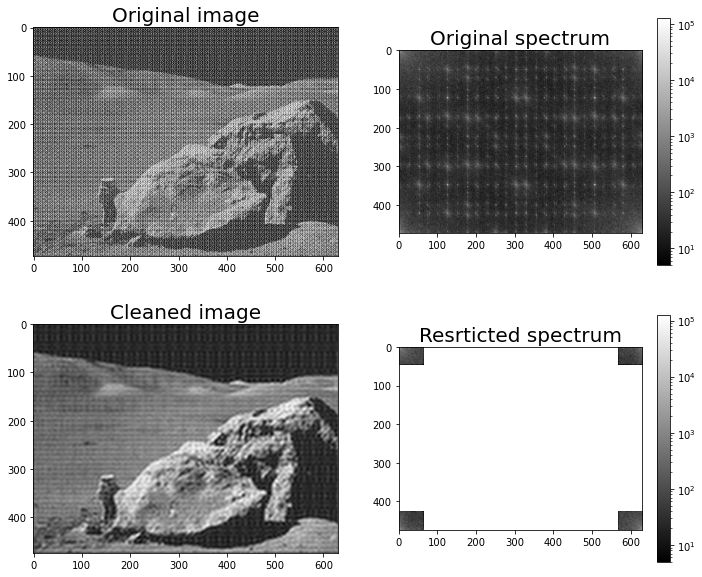

In [78]:
im=plt.imread('moonlanding.png')
print(im.shape)

#plt.imshow(im, plt.cm.gray)

im_fft2d=fftpack.fft2(im)
im_p=np.abs(im_fft2d)

fig = plt.figure(figsize=(12, 10))
gridsize = (2, 2)
ax1 = plt.subplot2grid(gridsize, (0, 0))
ax1=plt.imshow(im,cmap='gray')
ax1=plt.title('Original image', fontsize=20)
ax2=plt.subplot2grid(gridsize,(0,1))
ax2=plt.imshow(im_p, norm=LogNorm(vmin=5),cmap='gray')
ax2=plt.colorbar()
ax2=plt.title('Original spectrum', fontsize=20)
#FREQUENCY SELECTION

frac=0.1
im_c=im_fft2d.copy()

#1
im_c[:,int(frac*im.shape[1]):int((1-frac)*im.shape[1])]=0
im_c[int(frac*im.shape[0]):int((1-frac)*im.shape[0]),:]=0

#2
#im_c[:,int((1-frac)*im.shape[1]):im.shape[1]]=0
#im_c[int((1-frac)*im.shape[0]):im.shape[0],:]=0
#im_c[:,0:int(frac*im.shape[1])]=0
#im_c[0:int(frac*im.shape[0]),:]=0

#3
#im_c[:,int((1-frac)*im.shape[1]):im.shape[1]]=0
#im_c[int((1-frac)*im.shape[0]):im.shape[0],:]=0

#4
#im_c[im_c>1000]=0

#5
#im_c[int((1-frac)*im.shape[0]):,int((1-frac)*im.shape[1]):]=0

#ANTITRANSFORM

n_im=fftpack.ifft2(im_c).real
n_im=np.abs(n_im)

ax3=plt.subplot2grid(gridsize,(1,0))
ax3=plt.imshow(n_im,cmap='gray')
ax3=plt.title('Cleaned image', fontsize=20)

ax4=plt.subplot2grid(gridsize,(1,1))
ax4=plt.imshow(np.abs(im_c), norm=LogNorm(vmin=5),cmap='gray')
ax4=plt.colorbar()
ax4=plt.title('Resrticted spectrum', fontsize=20)

print(im_fft2d.shape)
#im_new=ifft2(im_fft2d)
#plt.imshow(im_p,plt.cm.gray)
time=np.arange(21)
#plt.plot(time,power)
